## Assignment 2 Regression Examples

In [495]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  RFECV


# Read in data
df = pd.read_csv('datasets/AmesHousingSetA.csv')
df.head()

,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
1,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
2,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
3,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
4,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500


In [496]:
print(df.info())
df.shape
#exploring the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 81 columns):
PID                2344 non-null int64
MS.SubClass        2344 non-null int64
MS.Zoning          2344 non-null object
Lot.Frontage       1946 non-null float64
Lot.Area           2344 non-null int64
Street             2344 non-null object
Alley              166 non-null object
Lot.Shape          2344 non-null object
Land.Contour       2344 non-null object
Utilities          2344 non-null object
Lot.Config         2344 non-null object
Land.Slope         2344 non-null object
Neighborhood       2344 non-null object
Condition.1        2344 non-null object
Condition.2        2344 non-null object
Bldg.Type          2344 non-null object
House.Style        2344 non-null object
Overall.Qual       2344 non-null int64
Overall.Cond       2344 non-null int64
Year.Built         2344 non-null int64
Year.Remod.Add     2344 non-null int64
Roof.Style         2344 non-null object
Roof.Matl          2

(2344, 81)

In [497]:
df = df.drop(['PID','Alley','Pool.QC','Fence','Misc.Feature'],axis=1)
#dropping columns with excessive nulls

In [498]:
df['SalePrice'].describe()
#Looking at our dependent variable which we are most interested in. 

count      2344.000000
mean     180512.479522
std       81071.834942
min       12789.000000
25%      129350.000000
50%      160000.000000
75%      213000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [499]:
# Get a list of the categorical features.
def cat_features(dataframe):
    td = pd.DataFrame({'a':[1,2,3], 'b':[1.0, 2.0, 3.0]})
    return filter(lambda x: not(dataframe[x].dtype in [td['a'].dtype, td['b'].dtype]), list(dataframe))

cats = list(cat_features(df))
print(cats)

['MS.Zoning', 'Street', 'Lot.Shape', 'Land.Contour', 'Utilities', 'Lot.Config', 'Land.Slope', 'Neighborhood', 'Condition.1', 'Condition.2', 'Bldg.Type', 'House.Style', 'Roof.Style', 'Roof.Matl', 'Exterior.1st', 'Exterior.2nd', 'Mas.Vnr.Type', 'Exter.Qual', 'Exter.Cond', 'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.Type.2', 'Heating', 'Heating.QC', 'Central.Air', 'Electrical', 'Kitchen.Qual', 'Functional', 'Fireplace.Qu', 'Garage.Type', 'Garage.Finish', 'Garage.Qual', 'Garage.Cond', 'Paved.Drive', 'Sale.Type', 'Sale.Condition']


In [500]:
y = df.groupby('Overall.Qual')['SalePrice'].mean().sort_values(ascending = False)
print(y)
#Showing correlation between quality and sale price

Overall.Qual
10    454278.107143
9     369316.136364
8     270742.913858
7     204781.981092
6     162031.778151
5     134346.546003
4     105977.748634
3      85573.758621
2      52102.416667
1      51866.666667
Name: SalePrice, dtype: float64


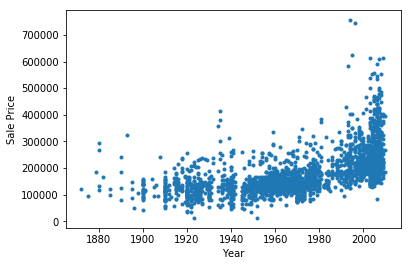

In [501]:
plt.plot(df['Year.Built'], df['SalePrice'], marker = '.', linestyle = 'none')
plt.xlabel('Year')
plt.ylabel('Sale Price')
plt.show()
#plot between Year Built and Sale Price

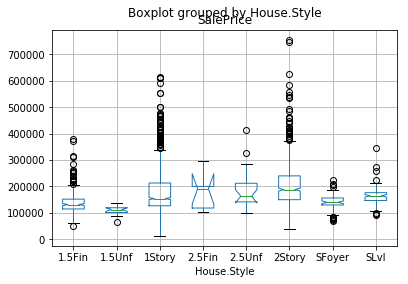

In [502]:
df.boxplot(column='SalePrice', by='House.Style', notch = True)
#Showing statistically significant differences in mean sale prices of homes by style of home
#The factors all seem to have a relationship with our dependent variable and should be included in our model.

In [503]:
dfa = pd.get_dummies(df,columns=cats )
dfa.head()
#Getting our categorical variables in order to 1 hot encode them

,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Mas.Vnr.Area,BsmtFin.SF.1,BsmtFin.SF.2,...,Sale.Type_ConLw,Sale.Type_New,Sale.Type_Oth,Sale.Type_WD,Sale.Condition_Abnorml,Sale.Condition_AdjLand,Sale.Condition_Alloca,Sale.Condition_Family,Sale.Condition_Normal,Sale.Condition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [504]:
dfa.shape

(2344, 285)

In [505]:
cs = list(dfa.columns)
cs.remove('SalePrice')

data_x = dfa[cs]
data_y = dfa['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size= 0.2, random_state = 4)

In [506]:
# Crating the preprocessing Pipeline

#Imputing for mode responses. Replaces NaN's 
imp = preprocessing.Imputer(missing_values='NaN', strategy = 'most_frequent', axis=0)

#standard (z-score) scaler
scaler = preprocessing.StandardScaler()

# Run the training data through preprocessing pipeline 
train_x_pp = imp.fit_transform(x_train)
train_x_pp = scaler.fit_transform(train_x_pp)


C:\Users\Andrew\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [507]:
selector_f = SelectPercentile(f_regression, percentile=25)
selector_f.fit(train_x_pp, y_train)
fscores = []
for name, score, pv in zip(list(dfa), selector_f.scores_, selector_f.pvalues_):
    if pv <.05:
        fscores.append(name)

for i in dfa.columns:
    if i not in fscores:
        dfa = dfa.drop(i,axis = 1)
#Feature selecting using an F test. Only including variables with 95% confidence that they affect the dependent variable.        

C:\Users\Andrew\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Andrew\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Andrew\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Andrew\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [508]:
# Build the model on the preprocessed training data 
model = linear_model.LinearRegression()
model.fit(train_x_pp, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [509]:
def print_regression_error_metrics(preds, y_test):
    print('MSE, MAE, R^2, EVS: ' + str([mean_squared_error(y_test, preds),
           median_absolute_error(y_test, preds),
           r2_score(y_test, preds),
           explained_variance_score(y_test, preds)]))

In [510]:
# Run our test data through the same pipeline  
test_x_pp = imp.transform(x_test)
test_x_pp = scaler.transform(test_x_pp)

# Predict on the transformed test data and show the evaluation results 
preds = model.predict(test_x_pp)
print_regression_error_metrics(preds, y_test)

MSE, MAE, R^2, EVS: [1.1599093623275854e+27, 11105.740625109174, -1.7110751986828966e+17, -1.706049489454762e+17]


In [511]:
#Run a lasso regression to reduce overfitting and improve upon our base model.
lasso1 = Lasso(alpha=0.01)
lasso1.fit(train_x_pp,y_train)
lass = lasso1.predict(test_x_pp)
print_regression_error_metrics(lass, y_test)

MSE, MAE, R^2, EVS: [709122661.5101696, 11123.796136083838, 0.8953916367655479, 0.8960177178413364]


C:\Users\Andrew\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [512]:
ridge1 = Ridge(alpha=0.01)
ridge1.fit(train_x_pp,y_train)
ridg = ridge1.predict(test_x_pp)
print_regression_error_metrics(ridg, y_test)

MSE, MAE, R^2, EVS: [709208167.2176665, 11103.858896776102, 0.8953790231338111, 0.8960012458932444]


In [513]:
#Testing our model on the second dataset.
df2 = pd.read_csv('datasets/AmesHousingSetB.csv')
dfb = pd.get_dummies(df2,columns=cats )
dfb = dfb.drop(['PID','Alley','Pool.QC','Fence','Misc.Feature'],axis=1)
dfb.shape

(586, 257)

In [514]:
for i in dfa.columns:
    if i not in dfb.columns:
        zero = pd.Series(np.zeros(len(dfb)))
        dfb[i] = zero
        
for i in dfb.columns:
    if i not in dfa.columns:
        dfb = dfb.drop(i,axis=1)
dfb.shape    
#This corrects for differences in dimension that arise from categorical responses not in dataset B which were not 1 hot encoded. 
#Accounted for by including dummy variable which contains only zeros which is technically accurate

(586, 193)

In [515]:
z = list(dfb.columns)
z.remove('SalePrice')

data_z = dfb[z]
data_ind = dfb['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(data_z, data_ind, test_size= 0.2, random_state = 4)

train_z_pp = imp.fit_transform(x_train)
train_z_pp = scaler.fit_transform(train_z_pp)
#Repeating the same process as before, builing our base model.

In [516]:
model.fit(train_z_pp, y_train)
test_z_pp = imp.transform(x_test)
test_z_pp = scaler.transform(test_z_pp)

# Predict on the transformed test data and show the evaluation results 
preds2 = model.predict(test_z_pp)
print_regression_error_metrics(preds2, y_test)

MSE, MAE, R^2, EVS: [3.563010346720386e+28, 13305.275799860916, -6.955101683285264e+18, -6.89615092686998e+18]


In [517]:
#Running a second lasso regression
lasso2 = Lasso(alpha=0.01)
lasso2.fit(train_z_pp,y_train)
lass2 = lasso2.predict(test_z_pp)
print_regression_error_metrics(lass2, y_test)

MSE, MAE, R^2, EVS: [600252274.8933195, 12749.315182536477, 0.8828289788338928, 0.8831978380415726]


C:\Users\Andrew\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## Part 2: Questions


### I Data Preparation:
#### The only data transformation I performed was to remove certain columns with excessive number of null responses. I also removed the ID column as it is by definition arbitrary and would only create noise in the regression.

### II Exploratory Analysis
#### 1) I observed some apparent relationships between the year a house was built, its quality rating, and the style of home with the price it sold for.
#### 2) I would expect other features and amenities such as presence of basements, garages, bathrooms, and fireplaces to go towards an increased sale price.

### III Model Building
#### For my model, I first one-hot-encoded my categorical variables so that their effect could be measured. I then imputed to account for null values and missing categorical responses. My base linear regression was a very poor estimator with high variance and extremely low R^2. However, the Ridge and Lasso models were fairly good estimators both with R^2s around 89%. I chose to mostly examine R^2 as it told me how much of the change in housing prices my model could account for. 


### Predicting and Validating
#### 1) I performed the same transformations and regressions on the second dataset. My best lasso model ended up producing an R^2 of 88% which is only slightly worse than the original dataset with similarly small variance. 
#### 2) I would say that my model ended up being a fairly good predictor of housing prices. I accounted for categorical variables by one-hot-encoding and I only included features that I was 95% confident that they had a significant effect on the dependent variable. I also employed a lasso model which I believe was especially effective since it gives appropriate weight/importance to the most significant variables. In a dataset with so many features which many of which may have been correlated with each other this model was about to account for the difference-making features. In a sense it served as a second form of feature selection.